In [1]:
#importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from pandas import read_csv
import seaborn as sns
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing

In [2]:
#loading training dataset from drive
train_data=pd.read_csv('/content/drive/MyDrive/Boot_Camp_ML_IITB/Week_01/corrected train set.csv')

# EDA on the dataset

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16108 non-null  int64  
 1   product_code    16108 non-null  object 
 2   loading         15969 non-null  float64
 3   attribute_0     16108 non-null  object 
 4   attribute_1     16108 non-null  object 
 5   attribute_2     16108 non-null  int64  
 6   attribute_3     16108 non-null  int64  
 7   measurement_0   16108 non-null  int64  
 8   measurement_1   16108 non-null  int64  
 9   measurement_2   16108 non-null  int64  
 10  measurement_3   15880 non-null  float64
 11  measurement_4   15788 non-null  float64
 12  measurement_5   15681 non-null  float64
 13  measurement_6   15618 non-null  float64
 14  measurement_7   15548 non-null  float64
 15  measurement_8   15468 non-null  float64
 16  measurement_9   15363 non-null  float64
 17  measurement_10  15303 non-null 

In [4]:
train_data.isnull().sum()

id                   0
product_code         0
loading            139
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      228
measurement_4      320
measurement_5      427
measurement_6      490
measurement_7      560
measurement_8      640
measurement_9      745
measurement_10     805
measurement_11     878
measurement_12     957
measurement_13    1052
measurement_14    1084
measurement_15    1203
measurement_16    1289
measurement_17    1345
failure              0
dtype: int64

In [5]:
train_data.nunique()

id                16108
product_code          3
loading            9390
attribute_0           2
attribute_1           2
attribute_2           3
attribute_3           2
measurement_0        28
measurement_1        27
measurement_2        22
measurement_3      4282
measurement_4      4222
measurement_5      4220
measurement_6      4228
measurement_7      4254
measurement_8      4239
measurement_9      4219
measurement_10     4834
measurement_11     5961
measurement_12     5404
measurement_13     4887
measurement_14     5527
measurement_15     5989
measurement_16     6134
measurement_17    14508
failure               2
dtype: int64

In [6]:
train_data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


Label endoding on the to convert object values to int

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['product_code','attribute_0','attribute_1']
train_data[col] = train_data[col].apply(le.fit_transform)

In [8]:
train_data

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,1,1,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,0,84.89,1,1,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,0,82.43,1,1,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,0,101.07,1,1,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,0,188.06,1,1,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,16103,2,146.70,1,1,5,8,9,11,5,...,11.419,16.852,17.614,10.440,NaN,17.342,17.142,16.400,930.313,0
16104,16104,2,117.38,1,1,5,8,11,9,5,...,12.122,NaN,18.973,11.200,15.186,15.177,13.470,15.399,694.168,0
16105,16105,2,107.34,1,1,5,8,10,2,3,...,11.686,15.811,20.374,15.021,17.156,15.901,15.724,17.049,797.928,0
16106,16106,2,126.46,1,1,5,8,2,17,6,...,11.105,16.035,19.594,9.869,15.371,17.682,15.109,15.961,697.844,1


In [9]:
train_data['failure'].unique()

array([0, 1])

In [10]:
train_data.drop(['id'], axis=1, inplace=True)

In [11]:
train_data['product_code'].unique()

array([0, 1, 2])

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    16108 non-null  int64  
 1   loading         15969 non-null  float64
 2   attribute_0     16108 non-null  int64  
 3   attribute_1     16108 non-null  int64  
 4   attribute_2     16108 non-null  int64  
 5   attribute_3     16108 non-null  int64  
 6   measurement_0   16108 non-null  int64  
 7   measurement_1   16108 non-null  int64  
 8   measurement_2   16108 non-null  int64  
 9   measurement_3   15880 non-null  float64
 10  measurement_4   15788 non-null  float64
 11  measurement_5   15681 non-null  float64
 12  measurement_6   15618 non-null  float64
 13  measurement_7   15548 non-null  float64
 14  measurement_8   15468 non-null  float64
 15  measurement_9   15363 non-null  float64
 16  measurement_10  15303 non-null  float64
 17  measurement_11  15230 non-null 

Checking null values in the dataset

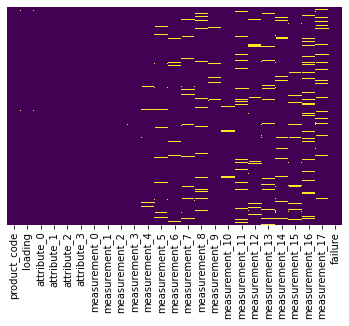

In [13]:
sns.heatmap(train_data.isnull(),yticklabels=False,xticklabels=True, cbar=False,cmap='viridis')

Dropping the columns having null values more than 20%

In [14]:
null_value = train_data.isnull().sum()
null_cols = null_value[null_value > len(train_data)*0.20]#elimination those feature in which more than 20% values are null
train_data_new = train_data.drop(list(null_cols.index), axis=1)
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    16108 non-null  int64  
 1   loading         15969 non-null  float64
 2   attribute_0     16108 non-null  int64  
 3   attribute_1     16108 non-null  int64  
 4   attribute_2     16108 non-null  int64  
 5   attribute_3     16108 non-null  int64  
 6   measurement_0   16108 non-null  int64  
 7   measurement_1   16108 non-null  int64  
 8   measurement_2   16108 non-null  int64  
 9   measurement_3   15880 non-null  float64
 10  measurement_4   15788 non-null  float64
 11  measurement_5   15681 non-null  float64
 12  measurement_6   15618 non-null  float64
 13  measurement_7   15548 non-null  float64
 14  measurement_8   15468 non-null  float64
 15  measurement_9   15363 non-null  float64
 16  measurement_10  15303 non-null  float64
 17  measurement_11  15230 non-null 

Iterative imputation (imputing missing values)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)#imputing missing values using sklearn library
imp.fit(train_data_new)
cleaned_data= imp.transform(train_data_new)#storing imputed dataframe
cleaned_data = pd.DataFrame(cleaned_data, columns = train_data_new.columns)

In [16]:
cleaned_data.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

Drawing histogram and box plot to visualize outliers in the data

<ipython-input-17-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
<ipython-input-17-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
<ipython-input-17-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warni

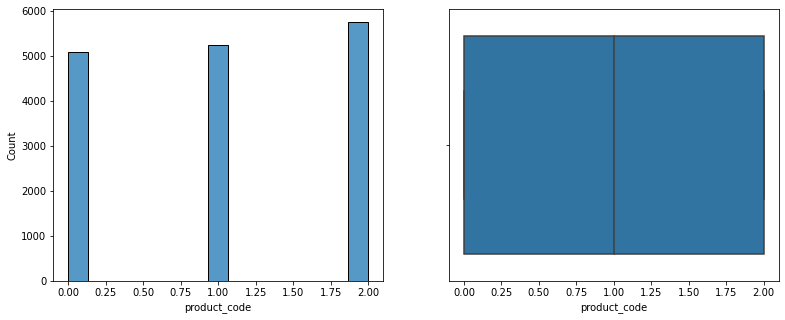

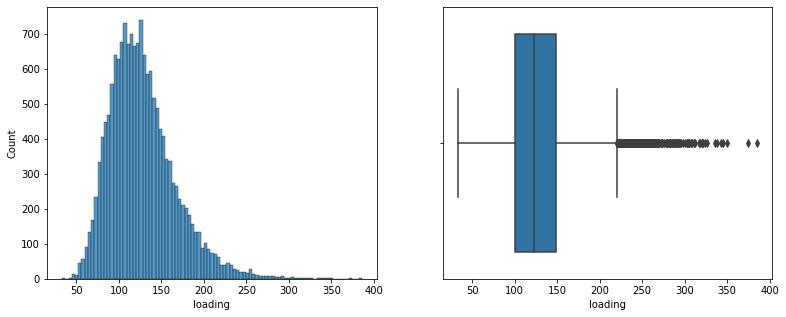

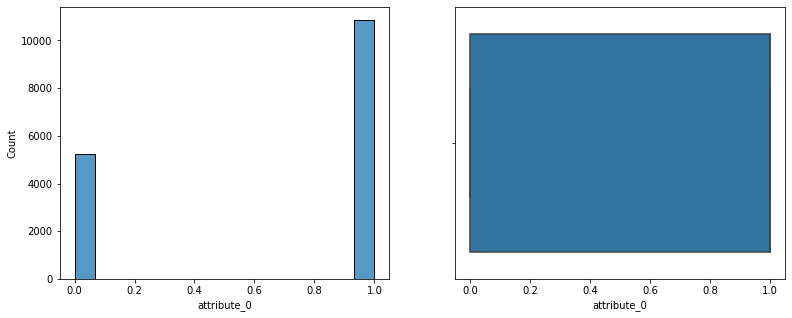

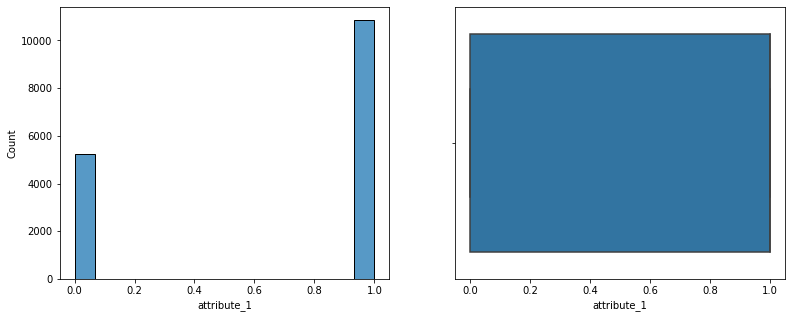

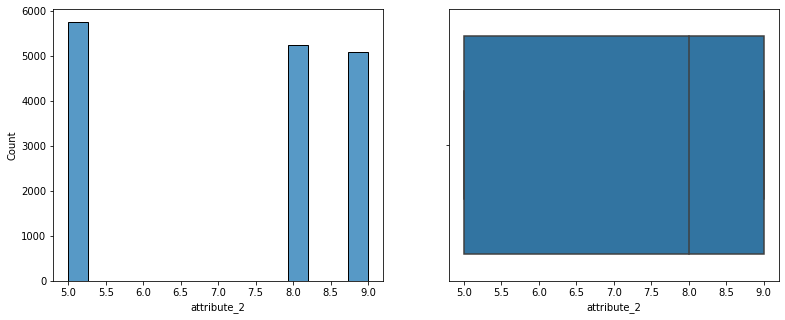

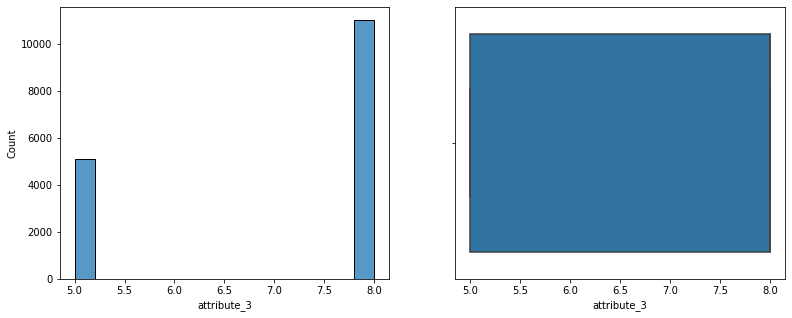

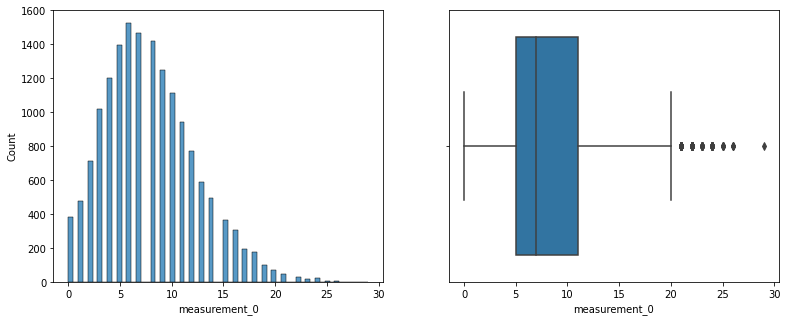

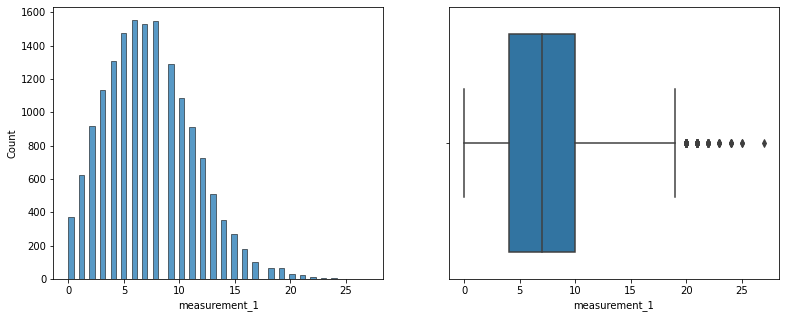

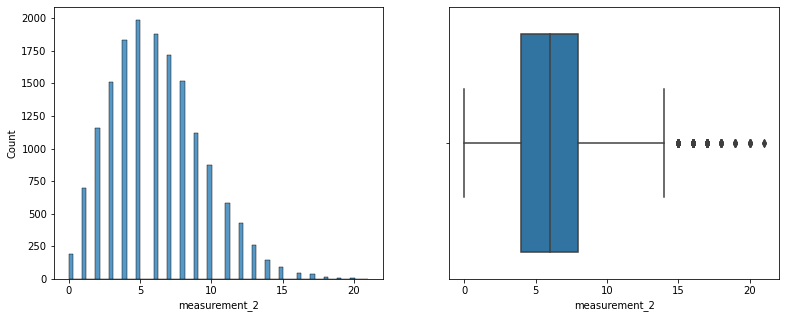

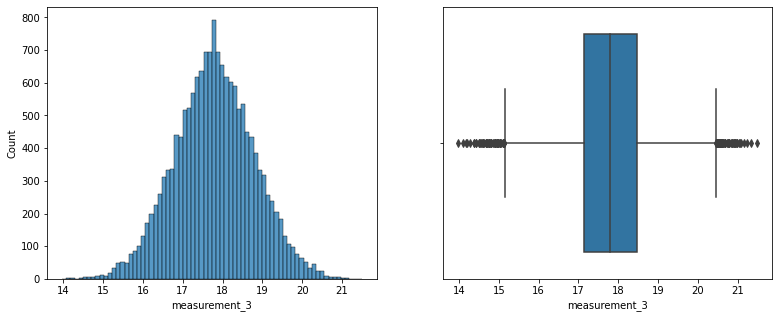

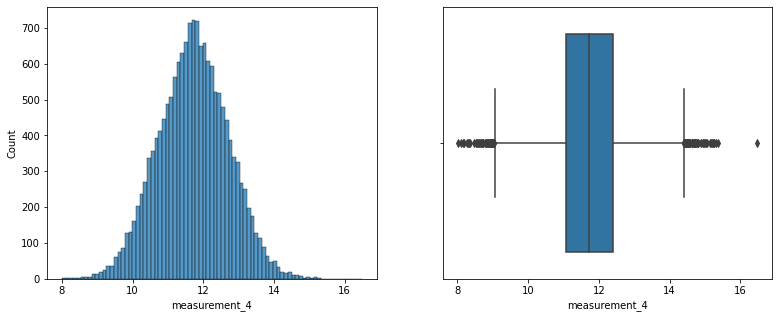

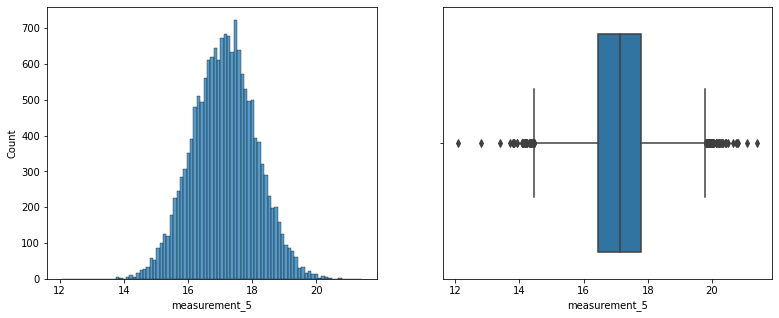

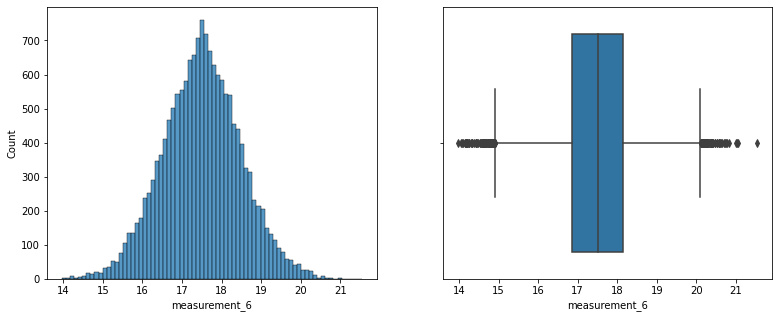

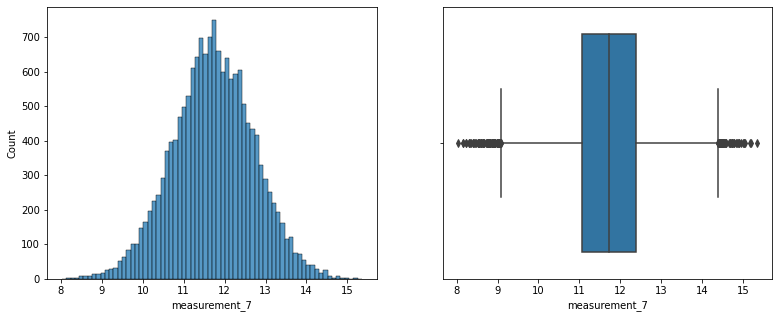

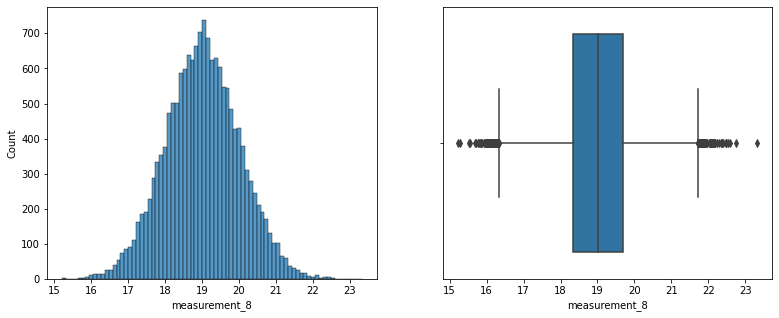

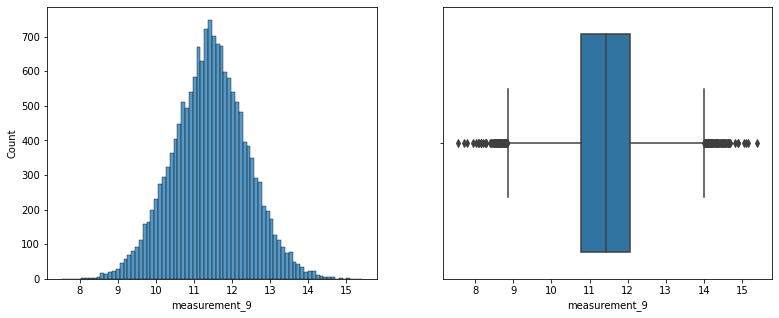

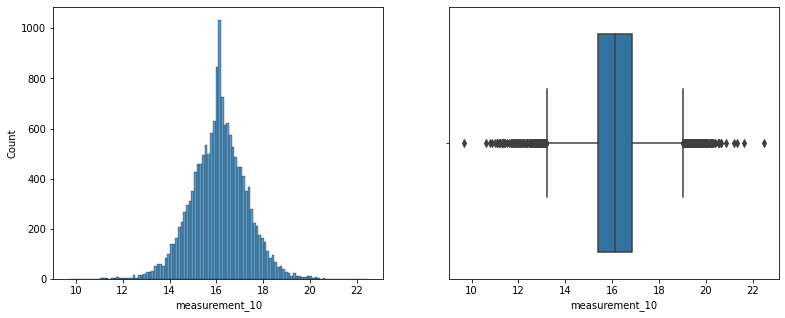

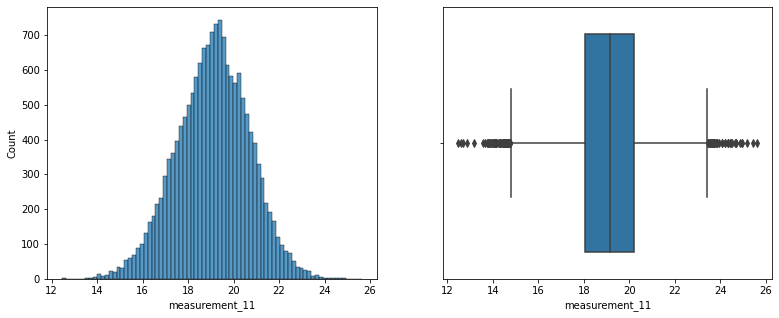

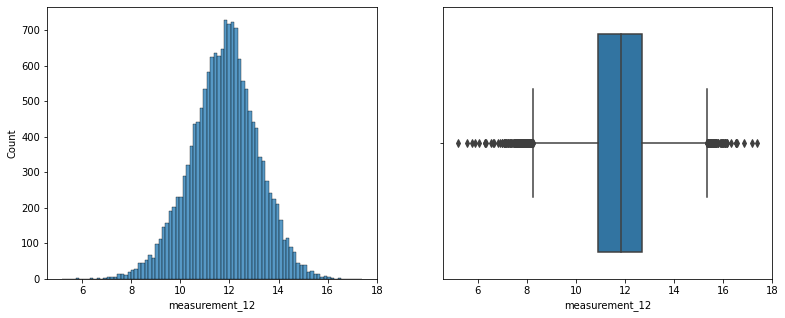

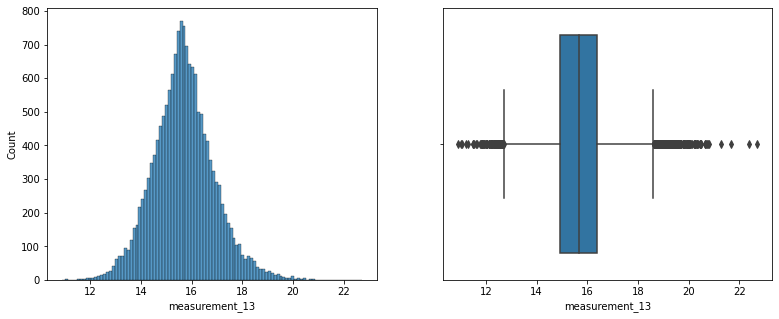

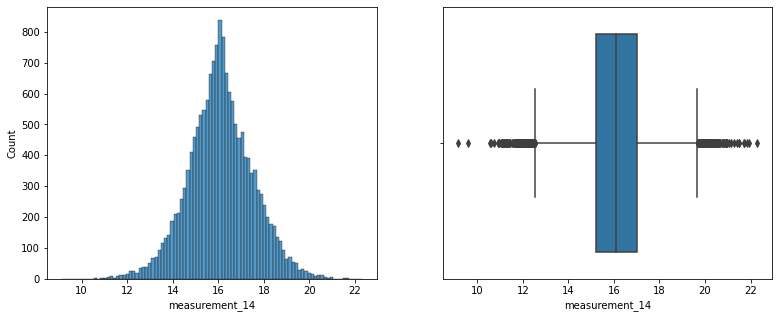

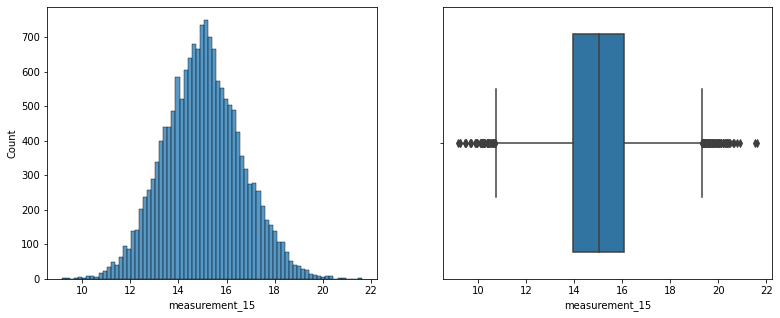

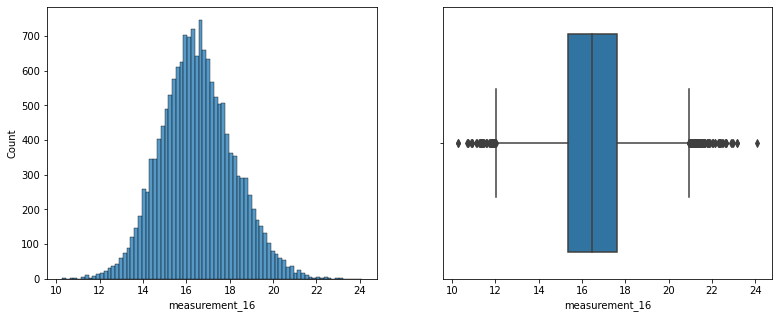

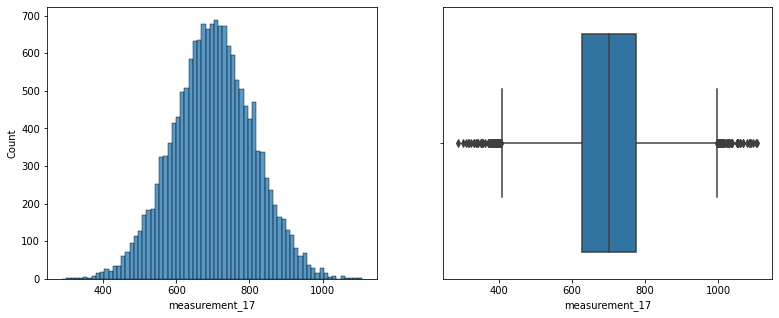

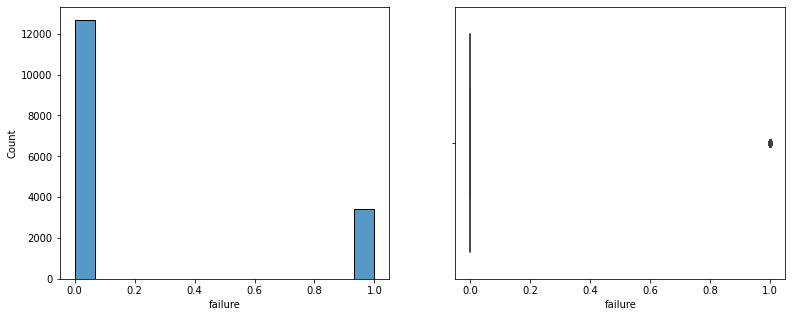

In [17]:
for col in cleaned_data.columns.values:#plotting histogram and box plot to display outliers
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
  sns.histplot(data=cleaned_data, x=col, ax=ax[0])
  sns.boxplot(data=cleaned_data, x=col, ax=ax[1])

In [18]:
cleaned_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,80.10,1.0,1.0,9.0,5.0,7.0,8.0,4.0,18.040,...,10.672,15.859000,17.594000,15.193,15.029000,16.127916,13.034,14.684,764.100,0.0
1,0.0,84.89,1.0,1.0,9.0,5.0,14.0,3.0,3.0,18.213,...,12.448,17.947000,17.915000,11.755,14.732000,15.425000,14.395,15.631,682.057,0.0
2,0.0,82.43,1.0,1.0,9.0,5.0,12.0,1.0,5.0,18.057,...,12.715,15.607000,19.452003,13.798,16.711000,18.631000,14.094,17.946,663.376,0.0
3,0.0,101.07,1.0,1.0,9.0,5.0,13.0,2.0,6.0,17.295,...,12.471,16.346000,18.377000,10.020,15.250000,15.562000,16.154,17.172,826.282,0.0
4,0.0,188.06,1.0,1.0,9.0,5.0,9.0,2.0,8.0,19.346,...,10.337,17.082000,19.932000,12.428,16.182000,12.760000,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,2.0,146.70,1.0,1.0,5.0,8.0,9.0,11.0,5.0,16.593,...,11.419,16.852000,17.614000,10.440,15.716723,17.342000,17.142,16.400,930.313,0.0
16104,2.0,117.38,1.0,1.0,5.0,8.0,11.0,9.0,5.0,18.525,...,12.122,16.125062,18.973000,11.200,15.186000,15.177000,13.470,15.399,694.168,0.0
16105,2.0,107.34,1.0,1.0,5.0,8.0,10.0,2.0,3.0,18.019,...,11.686,15.811000,20.374000,15.021,17.156000,15.901000,15.724,17.049,797.928,0.0
16106,2.0,126.46,1.0,1.0,5.0,8.0,2.0,17.0,6.0,17.057,...,11.105,16.035000,19.594000,9.869,15.371000,17.682000,15.109,15.961,697.844,1.0


eliminating outliers above and below 3 std deviation

In [19]:
for col in cleaned_data:#eliminating outliers
    upper_limit = cleaned_data[col].mean() + 3*cleaned_data[col].std()
    lower_limit = cleaned_data[col].mean() - 3*cleaned_data[col].std()
    cleaned_data[col] = np.where(
      cleaned_data[col]>upper_limit, upper_limit,
      np.where(cleaned_data[col]<lower_limit, lower_limit, cleaned_data[col]))

Again visualizing the data after removing outliers

<ipython-input-20-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
<ipython-input-20-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
<ipython-input-20-b3179abfbe21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warni

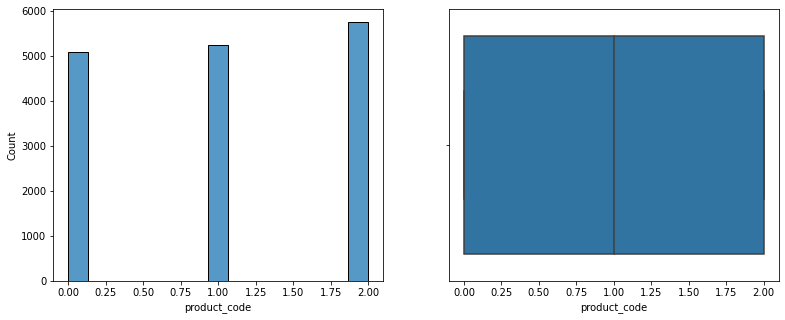

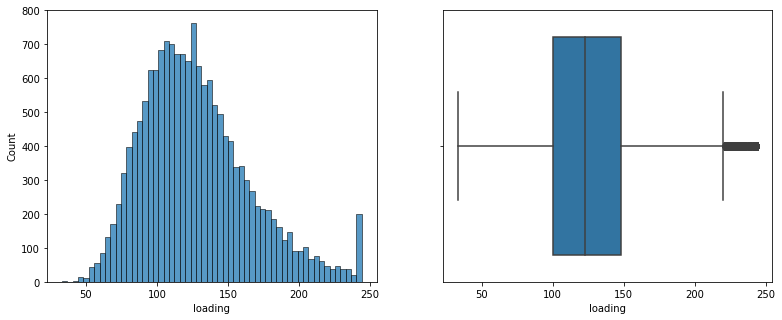

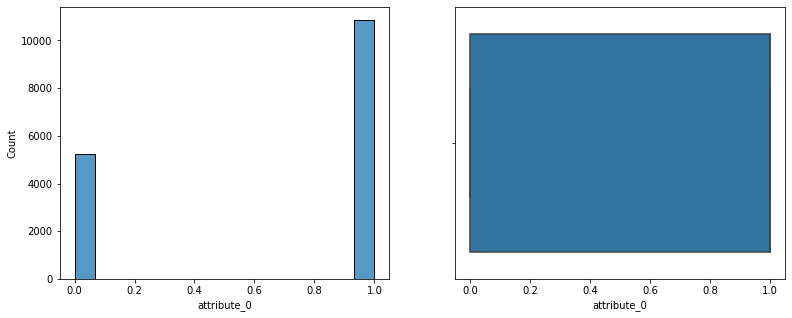

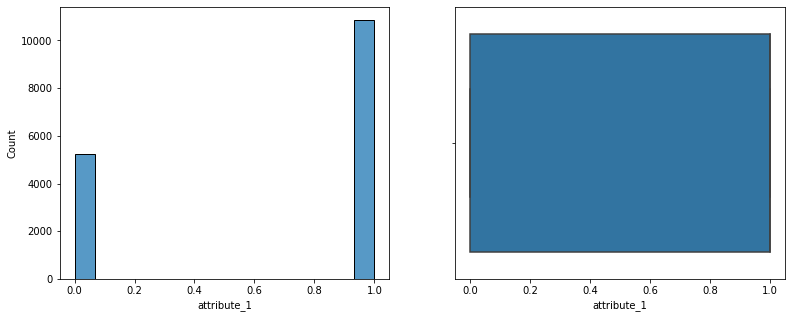

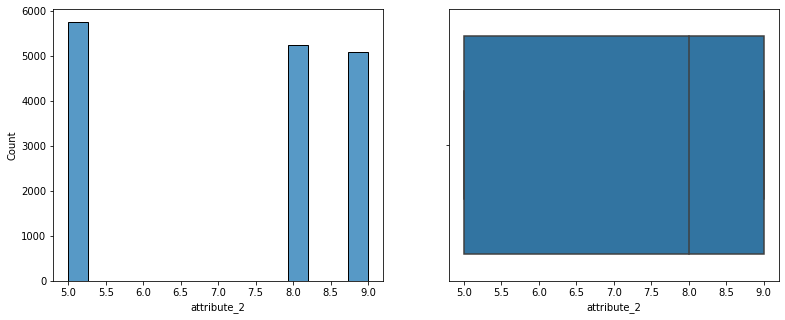

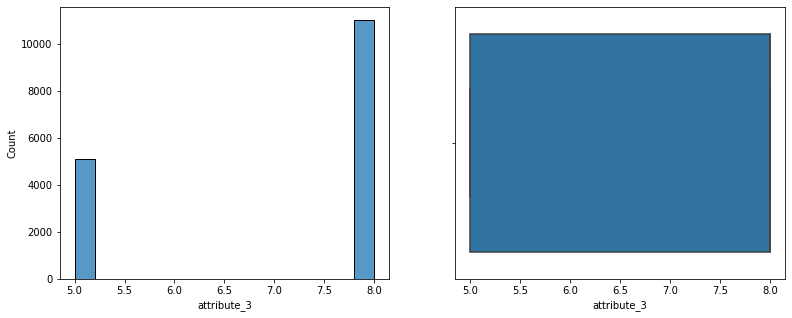

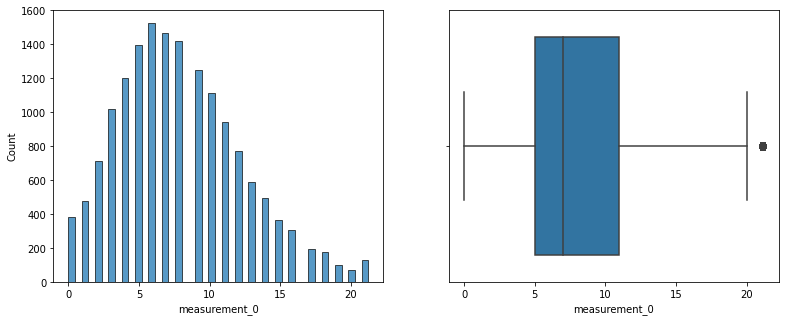

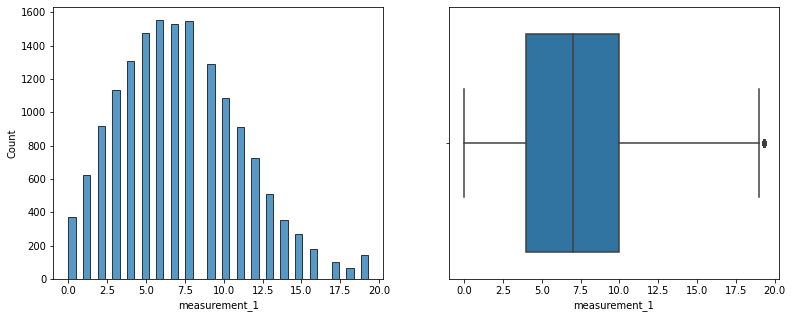

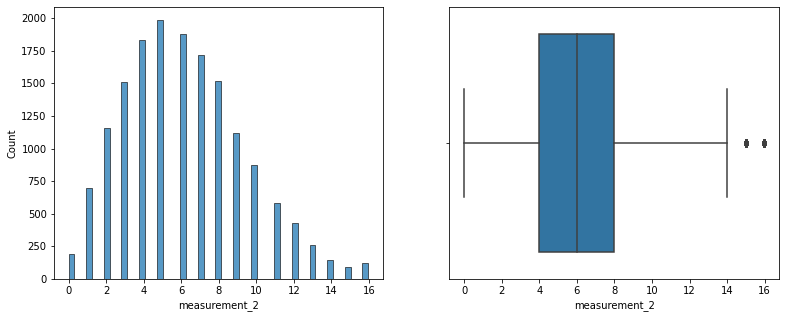

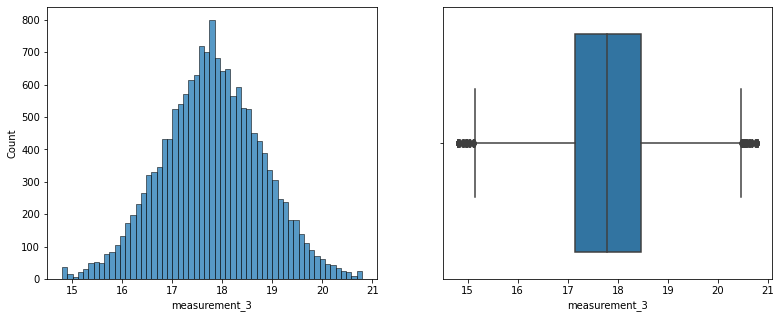

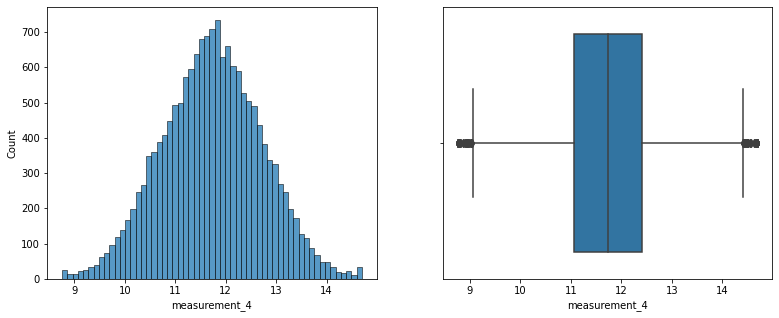

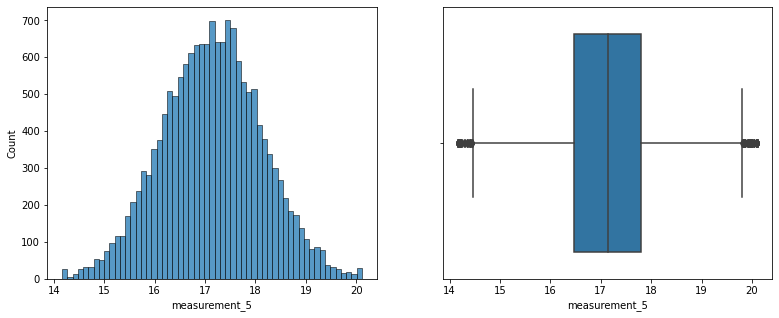

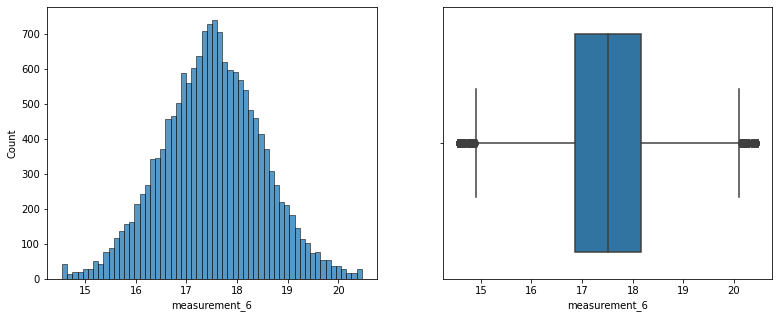

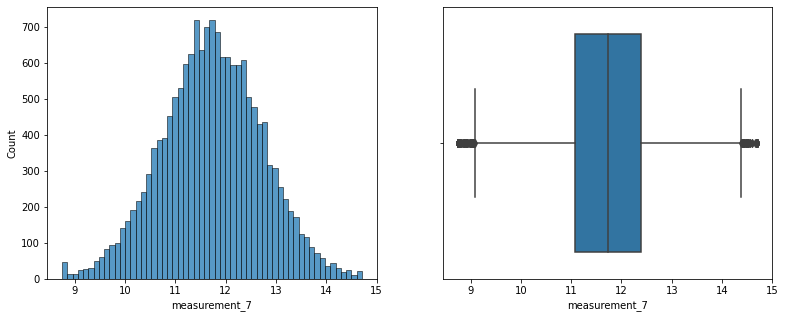

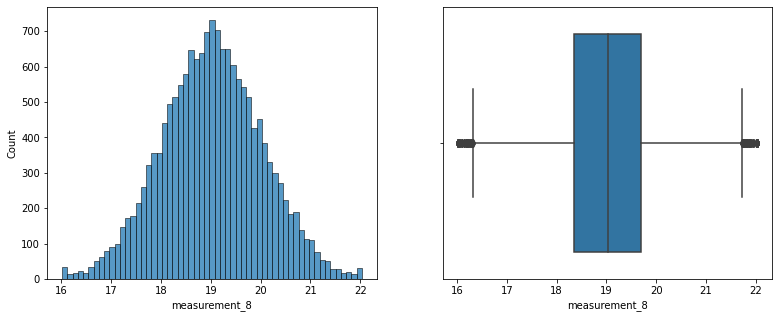

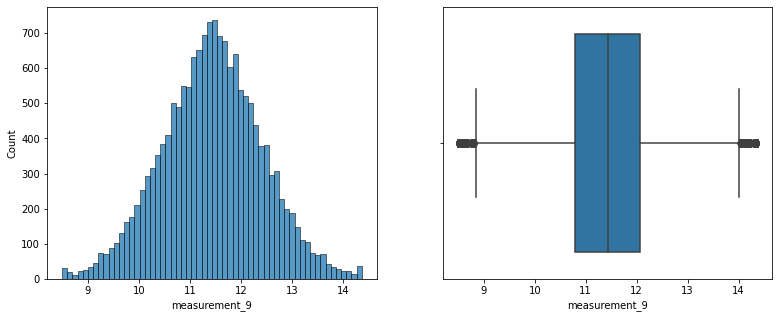

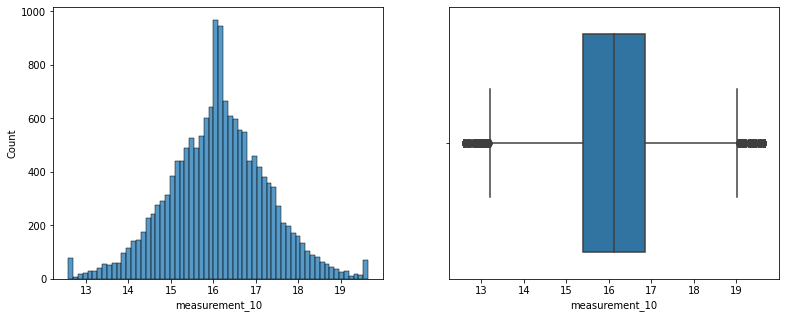

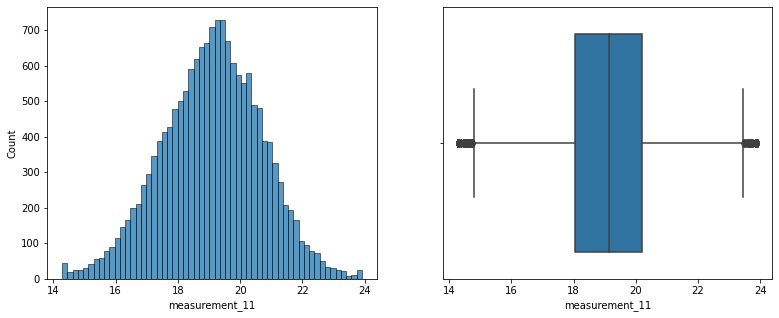

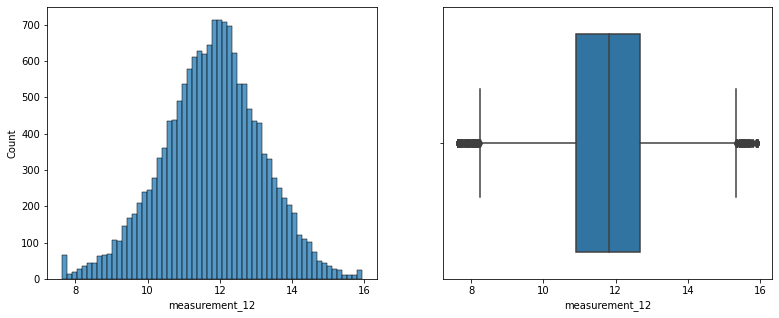

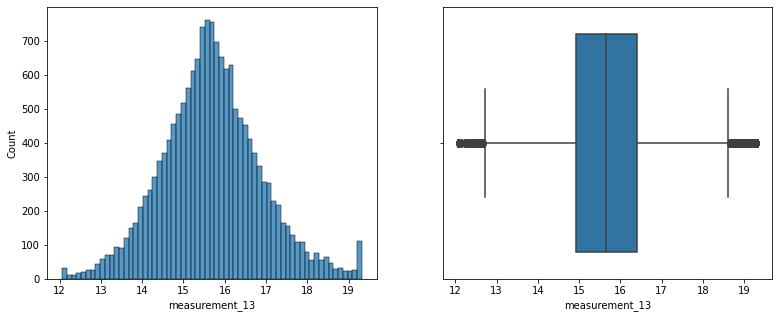

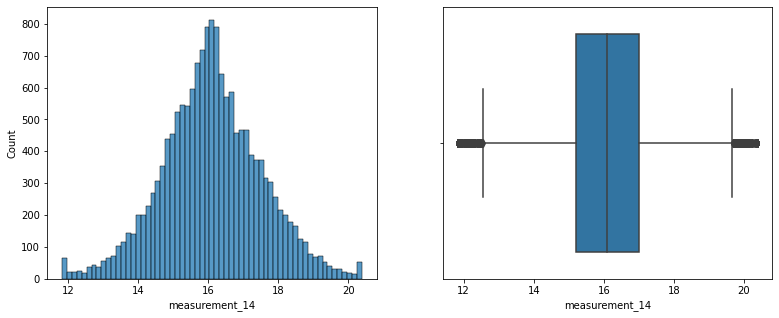

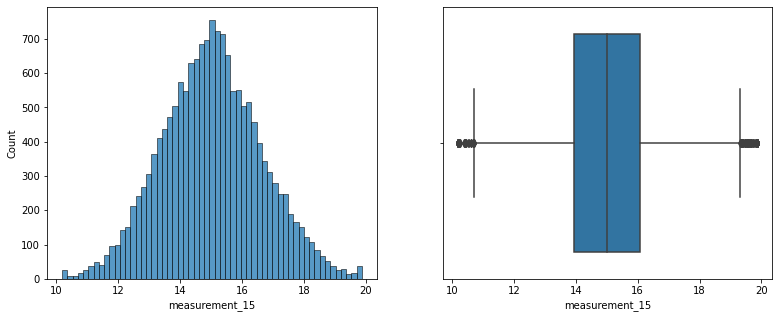

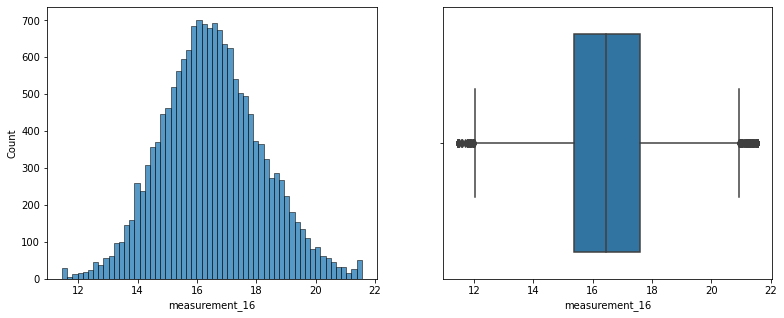

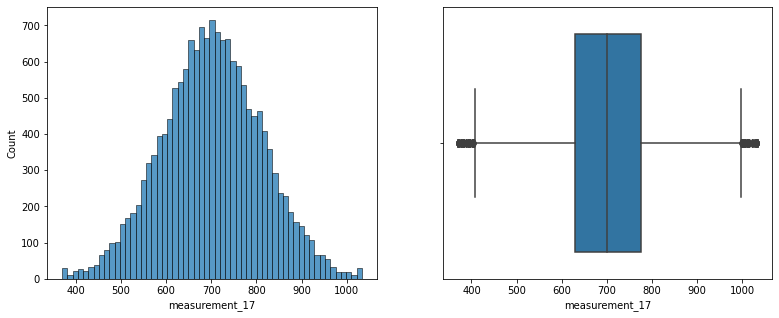

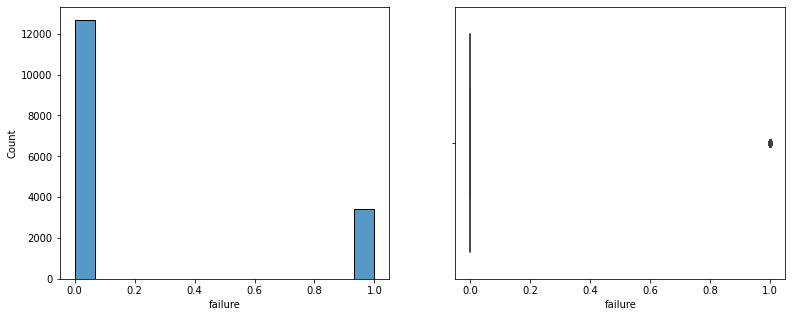

In [20]:
for col in cleaned_data.columns.values:#plotting histogram and box plot to display outliers
  fig, ax = plt.subplots(1, 2, figsize=(13,5))
  sns.histplot(data=cleaned_data, x=col, ax=ax[0])
  sns.boxplot(data=cleaned_data, x=col, ax=ax[1])

Checking correlation among features

In [21]:
cor_matrix=cleaned_data.corr()#checking correlation
cor_matrix

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
product_code,1.000000,0.005565,0.034640,0.034640,-0.962253,0.863978,-0.247471,0.458652,0.030300,-0.006969,...,-0.002349,0.003001,-0.168225,-0.299033,-0.009661,-0.001408,0.254895,-0.007362,-0.003536,-0.014994
loading,0.005565,1.000000,0.004951,0.004951,-0.006651,0.002411,-0.005274,-0.004775,0.002850,-0.010151,...,-0.010681,-0.002035,0.002440,0.002135,0.012598,-0.004654,-0.006082,-0.003465,-0.007125,0.130999
attribute_0,0.034640,0.004951,1.000000,1.000000,-0.305324,-0.473299,0.308494,-0.209967,-0.338782,0.005047,...,0.005859,0.014192,-0.003011,-0.066260,-0.130158,0.002230,-0.034226,-0.091652,0.002942,0.021225
attribute_1,0.034640,0.004951,1.000000,1.000000,-0.305324,-0.473299,0.308494,-0.209967,-0.338782,0.005047,...,0.005859,0.014192,-0.003011,-0.066260,-0.130158,0.002230,-0.034226,-0.091652,0.002942,0.021225
attribute_2,-0.962253,-0.006651,-0.305324,-0.305324,1.000000,-0.694328,0.151786,-0.379835,0.063387,0.005266,...,0.000642,-0.006724,0.161109,0.302969,0.044650,0.000734,-0.233548,0.031973,0.002568,0.008507
attribute_3,0.863978,0.002411,-0.473299,-0.473299,-0.694328,1.000000,-0.373557,0.510058,0.197396,-0.008685,...,-0.005022,-0.004505,-0.146762,-0.230193,0.057062,-0.002365,0.241916,0.039688,-0.004599,-0.023910
measurement_0,-0.247471,-0.005274,0.308494,0.308494,0.151786,-0.373557,1.000000,-0.248051,-0.166273,-0.004687,...,0.012907,0.007657,0.029396,0.054285,-0.050793,0.006386,-0.074621,-0.030805,0.000844,0.016752
measurement_1,0.458652,-0.004775,-0.209967,-0.209967,-0.379835,0.510058,-0.248051,1.000000,0.101148,-0.000864,...,0.000641,0.013199,-0.086843,-0.122496,0.026684,0.000882,0.125162,0.017538,-0.006997,-0.021207
measurement_2,0.030300,0.002850,-0.338782,-0.338782,0.063387,0.197396,-0.166273,0.101148,1.000000,-0.004673,...,0.006393,-0.004150,0.003317,0.000333,0.048600,0.008414,0.020848,0.019798,-0.001555,0.006389
measurement_3,-0.006969,-0.010151,0.005047,0.005047,0.005266,-0.008685,-0.004687,-0.000864,-0.004673,1.000000,...,0.006322,0.004132,-0.002412,0.009582,0.009740,0.005237,-0.015704,0.002186,0.068307,-0.001445


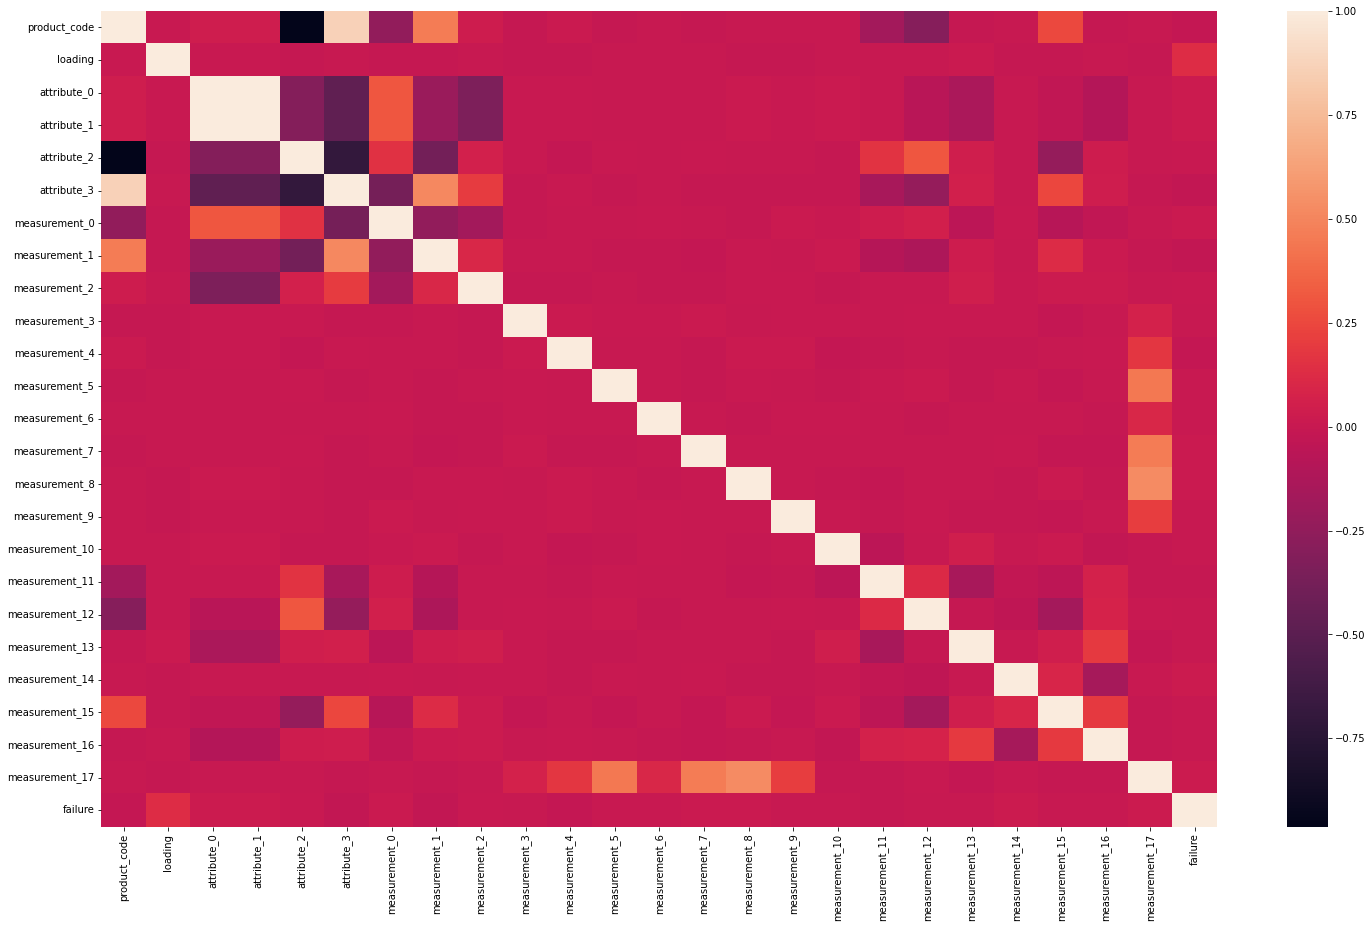

In [22]:
plt.figure(figsize=(25,15))# ploting heatmap to ses correlation
sns.heatmap(cor_matrix)

Removing highly correlated features

In [23]:
threshold = 0.8 #dropping those features which are highly correlated taking threshold of 90%


columns = np.full((cor_matrix.shape[0],), True, dtype=bool)
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[0]):
        if cor_matrix.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = cleaned_data.columns[columns]
cleaned_data_new = cleaned_data[selected_columns]

In [24]:
selected_columns

Index(['product_code', 'loading', 'attribute_0', 'attribute_2',
       'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3',
       'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
       'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11',
       'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
       'measurement_16', 'measurement_17', 'failure'],
      dtype='object')

In [25]:
cleaned_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,80.10,1.0,1.0,9.0,5.0,7.0,8.0,4.0,18.040,...,10.672,15.859000,17.594000,15.193,15.029000,16.127916,13.034,14.684,764.100,0.0
1,0.0,84.89,1.0,1.0,9.0,5.0,14.0,3.0,3.0,18.213,...,12.448,17.947000,17.915000,11.755,14.732000,15.425000,14.395,15.631,682.057,0.0
2,0.0,82.43,1.0,1.0,9.0,5.0,12.0,1.0,5.0,18.057,...,12.715,15.607000,19.452003,13.798,16.711000,18.631000,14.094,17.946,663.376,0.0
3,0.0,101.07,1.0,1.0,9.0,5.0,13.0,2.0,6.0,17.295,...,12.471,16.346000,18.377000,10.020,15.250000,15.562000,16.154,17.172,826.282,0.0
4,0.0,188.06,1.0,1.0,9.0,5.0,9.0,2.0,8.0,19.346,...,10.337,17.082000,19.932000,12.428,16.182000,12.760000,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,2.0,146.70,1.0,1.0,5.0,8.0,9.0,11.0,5.0,16.593,...,11.419,16.852000,17.614000,10.440,15.716723,17.342000,17.142,16.400,930.313,0.0
16104,2.0,117.38,1.0,1.0,5.0,8.0,11.0,9.0,5.0,18.525,...,12.122,16.125062,18.973000,11.200,15.186000,15.177000,13.470,15.399,694.168,0.0
16105,2.0,107.34,1.0,1.0,5.0,8.0,10.0,2.0,3.0,18.019,...,11.686,15.811000,20.374000,15.021,17.156000,15.901000,15.724,17.049,797.928,0.0
16106,2.0,126.46,1.0,1.0,5.0,8.0,2.0,17.0,6.0,17.057,...,11.105,16.035000,19.594000,9.869,15.371000,17.682000,15.109,15.961,697.844,1.0


In [26]:
cleaned_data_new

,product_code,loading,attribute_0,attribute_2,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,80.10,1.0,9.0,7.0,8.0,4.0,18.040,12.518,15.748,...,10.672,15.859000,17.594000,15.193,15.029000,16.127916,13.034,14.684,764.100,0.0
1,0.0,84.89,1.0,9.0,14.0,3.0,3.0,18.213,11.540,17.717,...,12.448,17.947000,17.915000,11.755,14.732000,15.425000,14.395,15.631,682.057,0.0
2,0.0,82.43,1.0,9.0,12.0,1.0,5.0,18.057,11.652,16.738,...,12.715,15.607000,19.452003,13.798,16.711000,18.631000,14.094,17.946,663.376,0.0
3,0.0,101.07,1.0,9.0,13.0,2.0,6.0,17.295,11.188,18.576,...,12.471,16.346000,18.377000,10.020,15.250000,15.562000,16.154,17.172,826.282,0.0
4,0.0,188.06,1.0,9.0,9.0,2.0,8.0,19.346,12.950,16.990,...,10.337,17.082000,19.932000,12.428,16.182000,12.760000,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,2.0,146.70,1.0,5.0,9.0,11.0,5.0,16.593,13.078,18.468,...,11.419,16.852000,17.614000,10.440,15.716723,17.342000,17.142,16.400,930.313,0.0
16104,2.0,117.38,1.0,5.0,11.0,9.0,5.0,18.525,11.704,17.439,...,12.122,16.125062,18.973000,11.200,15.186000,15.177000,13.470,15.399,694.168,0.0
16105,2.0,107.34,1.0,5.0,10.0,2.0,3.0,18.019,11.518,18.387,...,11.686,15.811000,20.374000,15.021,17.156000,15.901000,15.724,17.049,797.928,0.0
16106,2.0,126.46,1.0,5.0,2.0,17.0,6.0,17.057,13.234,15.955,...,11.105,16.035000,19.594000,9.869,15.371000,17.682000,15.109,15.961,697.844,1.0


# Classification Models

Preparing and training and test data

In [27]:
x_train= cleaned_data_new.iloc[:,:-1]
y_train= cleaned_data_new.iloc[:,-1:]

In [28]:
test_data=pd.read_csv('/content/drive/MyDrive/Boot_Camp_ML_IITB/Week_01/week 1 test.csv')

In [29]:
test_data

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,16108,C,145.08,material_7,material_8,5,8,9,7,8,...,18.218,12.015,15.247,NaN,11.303,16.717,16.768,14.707,17.190,658.222
1,16109,C,146.34,material_7,material_8,5,8,2,7,1,...,NaN,NaN,16.215,20.778,9.195,16.047,NaN,15.759,18.393,616.670
2,16110,C,118.14,material_7,material_8,5,8,1,9,3,...,16.701,11.181,16.391,20.434,9.365,16.182,15.934,12.487,14.615,433.006
3,16111,C,119.86,material_7,material_8,5,8,10,9,9,...,19.437,10.959,16.567,18.430,11.836,15.767,18.049,15.346,15.337,572.642
4,16112,C,122.66,material_7,material_8,5,8,8,9,9,...,18.068,10.333,18.631,17.557,11.959,16.202,14.098,14.110,15.025,486.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
10458,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
10459,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
10460,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [30]:
test_data.drop(columns=['id','attribute_1','attribute_3'], axis=1, inplace=True)

In [31]:
test_data

,product_code,loading,attribute_0,attribute_2,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,C,145.08,material_7,5,9,7,8,16.863,10.156,18.038,...,18.218,12.015,15.247,NaN,11.303,16.717,16.768,14.707,17.190,658.222
1,C,146.34,material_7,5,2,7,1,18.303,12.670,17.570,...,NaN,NaN,16.215,20.778,9.195,16.047,NaN,15.759,18.393,616.670
2,C,118.14,material_7,5,1,9,3,16.883,12.024,16.738,...,16.701,11.181,16.391,20.434,9.365,16.182,15.934,12.487,14.615,433.006
3,C,119.86,material_7,5,10,9,9,17.686,10.697,16.481,...,19.437,10.959,16.567,18.430,11.836,15.767,18.049,15.346,15.337,572.642
4,C,122.66,material_7,5,8,9,9,18.132,13.269,NaN,...,18.068,10.333,18.631,17.557,11.959,16.202,14.098,14.110,15.025,486.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,E,158.95,material_7,6,6,16,4,16.301,13.259,18.068,...,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
10458,E,146.02,material_7,6,10,12,8,17.543,NaN,17.984,...,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
10459,E,115.62,material_7,6,1,10,1,15.670,11.535,16.778,...,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
10460,E,106.38,material_7,6,2,9,4,18.059,NaN,16.918,...,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['product_code','attribute_0']
test_data[col] = test_data[col].apply(le.fit_transform)

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    10462 non-null  int64  
 1   loading         10351 non-null  float64
 2   attribute_0     10462 non-null  int64  
 3   attribute_2     10462 non-null  int64  
 4   measurement_0   10462 non-null  int64  
 5   measurement_1   10462 non-null  int64  
 6   measurement_2   10462 non-null  int64  
 7   measurement_3   10309 non-null  float64
 8   measurement_4   10244 non-null  float64
 9   measurement_5   10213 non-null  float64
 10  measurement_6   10156 non-null  float64
 11  measurement_7   10085 non-null  float64
 12  measurement_8   10054 non-null  float64
 13  measurement_9   9980 non-null   float64
 14  measurement_10  9967 non-null   float64
 15  measurement_11  9872 non-null   float64
 16  measurement_12  9818 non-null   float64
 17  measurement_13  9740 non-null  

In [60]:
test_data.isnull().sum()

product_code        0
loading           111
attribute_0         0
attribute_2         0
measurement_0       0
measurement_1       0
measurement_2       0
measurement_3     153
measurement_4     218
measurement_5     249
measurement_6     306
measurement_7     377
measurement_8     408
measurement_9     482
measurement_10    495
measurement_11    590
measurement_12    644
measurement_13    722
measurement_14    790
measurement_15    806
measurement_16    821
measurement_17    939
dtype: int64

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)#imputing missing values using sklearn library
imp.fit(test_data)
cleaned_test_data= imp.transform(test_data)#storing imputed dataframe
cleaned_test_data = pd.DataFrame(cleaned_test_data, columns = test_data.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
test_data=cleaned_test_data

In [65]:
test_data.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_2       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [34]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
test_data=scaler.fit(test_data)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nx_train=scaler.fit_transform(x_train)\ntest_data=scaler.fit(test_data)'

# SVM Model

In [35]:
def SVM_model(X_train, y_train):#defining function to find best parameters
 param_grid  =[{'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}]# tuning parameter to find best value;  radial basis function kernel ({'C': [0.1, 1, 10, 100], 'kernel': ['linear']} ,)
 model_svc = GridSearchCV(SVC(), param_grid , refit = True, verbose = 3, cv=5) 
 model_svc.fit(X_train, y_train)
 accuracy=model_svc.best_score_
 best_params=model_svc.best_params_
 return accuracy, best_params

In [36]:
SVM_model(x_train,y_train)# 50 min runtime

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  42.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  38.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  31.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  34.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  32.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  42.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  39.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  43.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  46.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  47.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  23.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  29.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  23.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  28.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  32.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.787 total time=  57.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.787 total time= 1.0min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.787 total time=  48.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.787 total time=  51.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.787 total time=  59.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.787 total time=  56.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.787 total time=  45.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.787 total time=  49.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.787 total time=  51.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.787 total time=  53.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.786 total time=  32.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.786 total time=  40.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.784 total time=  24.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.787 total time=  25.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.785 total time=  24.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=  56.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=  53.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=  53.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=  56.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=  53.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.2min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.4min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.2min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.0min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.702 total time=  53.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.723 total time=  51.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.718 total time=  51.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.713 total time=  51.4s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.721 total time=  52.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.787 total time=  54.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.787 total time= 1.3min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.1min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.0min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.0min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.787 total time= 1.0min


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.704 total time=  54.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.721 total time=  52.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.716 total time=  52.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.711 total time=  53.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.718 total time=  53.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7871244168708955, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'})

Predicting using best parameters

In [56]:
SVM_model=SVC(C=0.1, gamma=1, kernel='rbf',probability=True)
SVM_model.fit(x_train,y_train)
y_pred_svc=SVM_model.decision_function(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
y_pred_svc

array([-0.99951778, -0.99951778, -0.99951778, ..., -1.00029903,
       -0.87295528, -1.00029903])

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
classifier=LogisticRegression()
parameter={'penalty':['l2','l1'],'C':[0.1,1,2,3,4,5,6,10,100],'max_iter':[100,200,500]}
classifier_regression=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regression.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [42]:
print(classifier_regression.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [43]:
print(classifier_regression.best_score_)

0.7871244168708955


In [44]:
classifier=LogisticRegression(C=1, max_iter=100, penalty='l2')
classifier.fit(x_train,y_train)
y_pred_log=classifier.decision_function(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#   Elastic Net Logistic Regressor

In [45]:
def LogisticRegression_model (X_train,y_train):#defining function for elasticnet logistic regression
 model = LogisticRegression(penalty='elasticnet', solver= 'saga')
 ridge_params = {'C':[0.01, 0.1, 1, 10, 100],'l1_ratio':[0,.0001,.001,.1,.2,.3,.5,.9]} # different values of C and l1ratio to be tested
 model_ridge = GridSearchCV(estimator = model, param_grid = ridge_params, cv=5)
 model_ridge.fit(X_train,y_train)
 accuracy=model_ridge.best_score_
 best_params=model_ridge.best_params_
 return accuracy, best_params

# ROC AUC Curve

In [46]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [78]:
logistic_fpr, logistic_tpr, threshold= roc_curve(y_train,y_pred_log)
auc_logistic=auc(logistic_fpr, logistic_tpr)

In [79]:
SVC_fpr, SVC_tpr, threshold= roc_curve(y_train,y_pred_svc)
auc_SVC=auc(SVC_fpr, SVC_tpr)

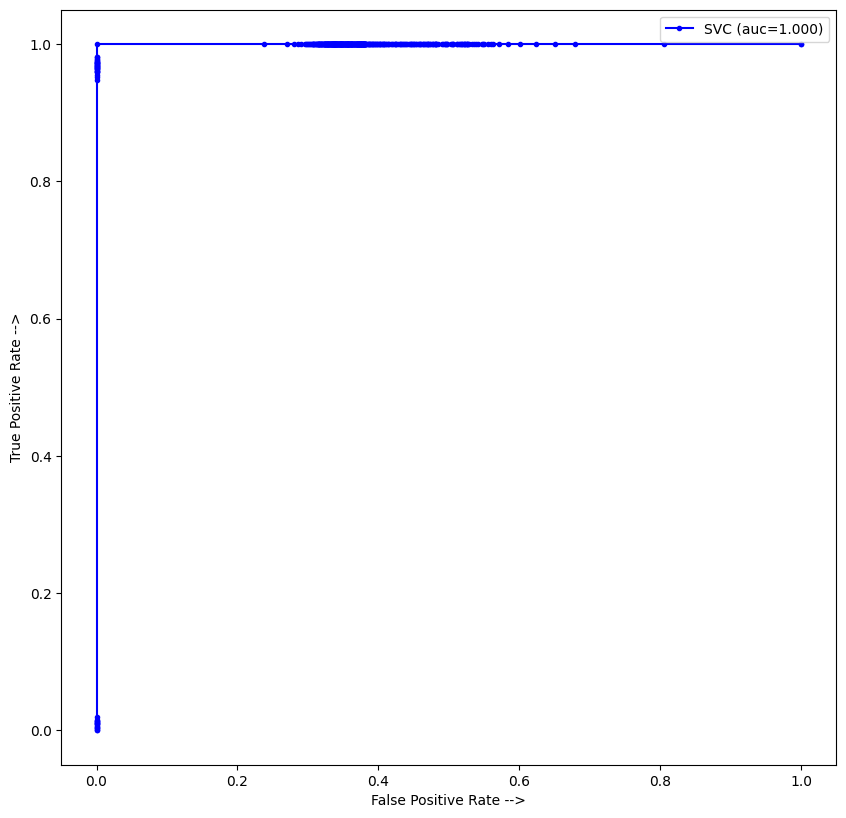

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=100)
#plt.plot(logistic_fpr, logistic_tpr,linestyle='-',color='r',label='Logistic (auc=%0.3f)' % auc_logistic)
plt.plot(SVC_fpr, SVC_tpr,marker='.',color='b',label='SVC (auc=%0.3f)' % auc_SVC)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

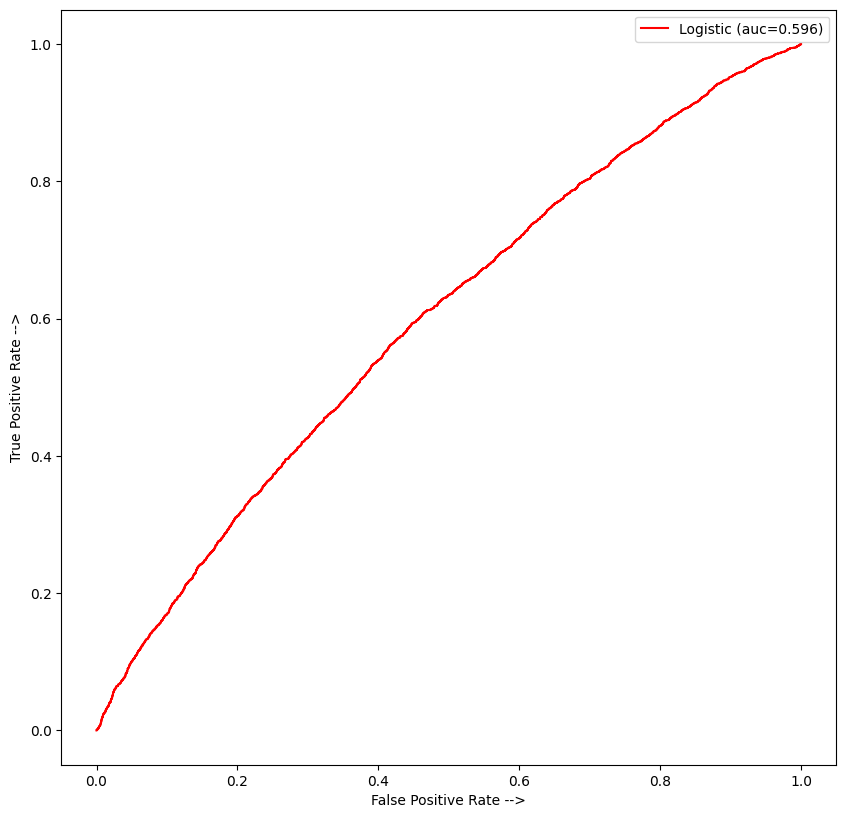

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,linestyle='-',color='r',label='Logistic (auc=%0.3f)' % auc_logistic)
#plt.plot(SVC_fpr, SVC_tpr,marker='.',color='b',label='SVC (auc=%0.3f)' % auc_SVC)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

Probability of failure

In [66]:
y_test_pred_svc=SVM_model.predict_proba(test_data)
y_test_pred_log=classifier.predict_proba(test_data)

In [83]:
pd.DataFrame(y_test_pred_svc) # showing probabilities of failure and not failure

,0,1
0,0.787129,0.212871
1,0.787129,0.212871
2,0.787129,0.212871
3,0.787129,0.212871
4,0.787129,0.212871
...,...,...
10457,0.787129,0.212871
10458,0.787129,0.212871
10459,0.787129,0.212871
10460,0.787129,0.212871


In [84]:
pd.DataFrame(y_test_pred_log) # showing probabilities of failure and not failure

,0,1
0,0.741103,0.258897
1,0.805825,0.194175
2,0.840972,0.159028
3,0.791981,0.208019
4,0.837195,0.162805
...,...,...
10457,0.767946,0.232054
10458,0.750728,0.249272
10459,0.808272,0.191728
10460,0.837049,0.162951
